# Introduction to Regression with Neural Network in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplfy it: prediction a numerical variable based on combination of other variables. Even shorter, predicting a number...

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

2.12.0


## Creating data to view and fit

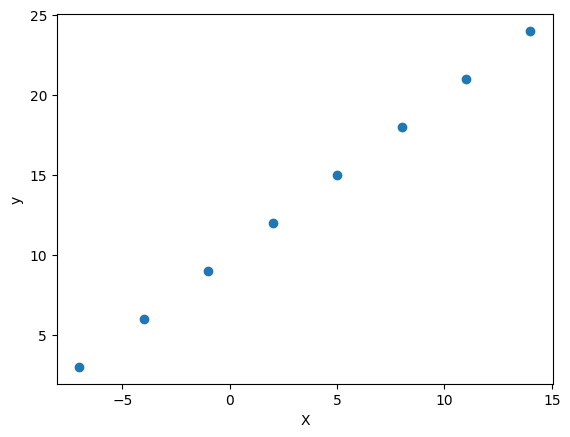

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize features and labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Let's check the input and output shape (Note that these shapes are not correct one)
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Let's check another input and output shape (Note that these shapes are not correct one)
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

As you see above, it seems our inputs and outputs have no shape. Let's turn numpy arrays to tensors for finding correct shape.

In [ ]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check tensor shapes
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layer, as well as the hidden layers of deep learning model.
2. **Compiling  a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performanse of our model)
3. **Fitting a model** - letting the model try to find patterns features and labels

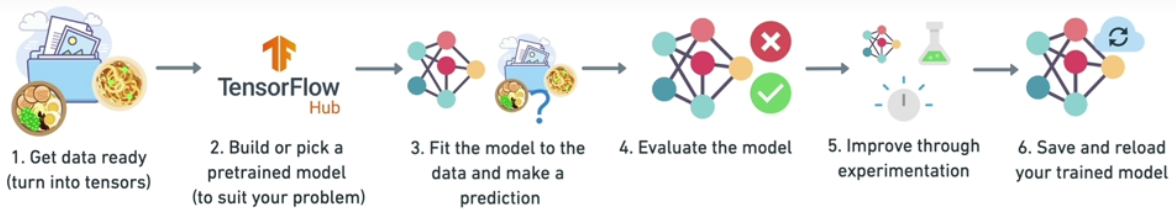

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 340ms/step - loss: 9.8632 - mae: 9.8632
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.7307 - mae: 9.7307
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 9.5982 - mae: 9.5982
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 9.4657 - mae: 9.4657
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3332 - mae: 9.3332


In [ ]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[20.689644]], dtype=float32)

Our expection for 17.0 is 20.68 but model prediction is -23.68. This is so bad prediction.

## Improving Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neuron) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - Here we might change the number of epoch (leave it training for longer) or more data (give the model more example to learn from)

### Increasing number of epoch

In [ ]:
# Let's rebuild model (increasing number of epoch)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 323ms/step - loss: 13.3409 - mae: 13.3409
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2084 - mae: 13.2084
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0759 - mae: 13.0759
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9434 - mae: 12.9434
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8109 - mae: 12.8109
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6784 - mae: 12.6784
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5459 - mae: 12.5459
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4134 - mae: 12.4134
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2809 - mae: 12.2809
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1484 - mae: 12.1484
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Remind X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's make a new prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.60528]], dtype=float32)

Our expection is 27 and model prediction is 26.60. This is better and close than before.

### Adding more hidden layers with 100 neuron

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 13.6388 - mae: 13.6388
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9795 - mae: 12.9795
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3783 - mae: 12.3783
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8217 - mae: 11.8217
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2377 - mae: 11.2377
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5454 - mae: 10.5454
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6637 - mae: 9.6637
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5641 - mae: 8.5641
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1431 - mae: 7.1431
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.2338 - mae: 5.2338
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
# Let's remind our data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[33.03018]], dtype=float32)

This prediction is worse than before. The model may have been overfitting.

### Change the optimization function

Our optimization function is Stochastic Gradient Descent, let's make it Adam and see what will happen.

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5813 - mae: 13.5813
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1610 - mae: 13.1610
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7825 - mae: 12.7825
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4126 - mae: 12.4126
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0682 - mae: 12.0682
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7311 - mae: 11.7311
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3921 - mae: 11.3921
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0480 - mae: 11.0480
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6959 - mae: 10.6959
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3262 - mae: 10.3262
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Remind data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[31.864826]], dtype=float32)

### Change the learning rate

Learning rate's default parameter is 0.001 for Adam optimizer. Let's make it 0.01

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 911ms/step - loss: 13.5473 - mae: 13.5473
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3887 - mae: 11.3887
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7860 - mae: 8.7860
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3476 - mae: 5.3476
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 5.2646 - mae: 5.2646
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6080 - mae: 6.6080
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 5.8028 - mae: 5.8028
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4.4337 - mae: 4.4337
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 3.7989 - mae: 3.7989
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 4.6800 - mae: 4.6800
Epoch 11/100
1/1 [==============================] - 0s 12ms/step

In [ ]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[28.542944]], dtype=float32)

Woowww.. It's look the best prediction..

### Common ways to improve a deep model

* Adding more hidden layers
* Adding more neurons
* Change the activation function
* Change the optimization function
* Change the learning rate
* Fitting for longer (increase number of epoch)
* Fitting on more data

## Evaluating a model

In practice, a typical workflow  you'll go through when building neural networks is:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it ```

When it comes to evaluation. There are 3 words you memorized:

> 'Visualize, Visualize, Visualize...'

It is a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does model look like?
* Traning of a model - How does a model perform while it learns?
* Prediction of the model -  How do the predictions of a model line up aganist the truth?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

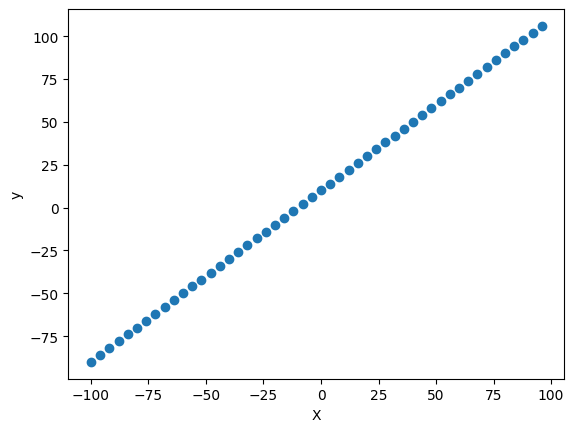

In [ ]:
# Plot data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### The three sets

* **Train set** - The model learns from this data, which is typically 70-80% of total data
* **Validation set** - The model gets tuned on this data which is typically 10-15% of total data
* **Test set** - The model gets evaulated on this data to test what is has learned, which is typically 10-15% of total data


In [ ]:
# Check the lenth of how many data we have
len(X)

50

In [ ]:
# Split the data into train and test set
X_train = X[:40] # first 40 are train samples (80% of our data)
y_train = y[:40]
            
X_test = X[40:] # last 10 are test samples (20% of our data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing data 

Now we've got our data in train and test sets. Let's visualize it again.

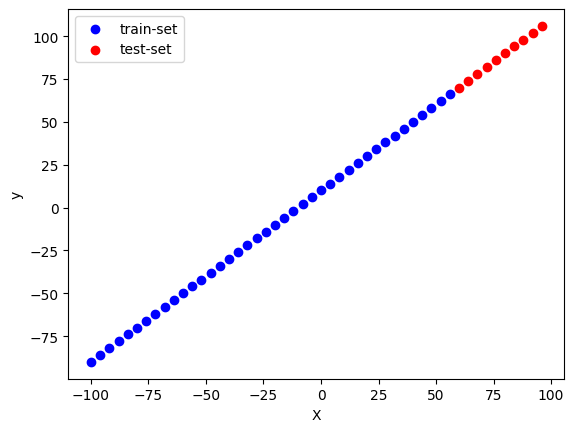

In [ ]:
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='train-set')
# plot test data in red
plt.scatter(X_test, y_test, c='r', label='test-set')
# show legend
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Let's build a neural network for our data

# 1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3.Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # Pass this part and check what will happen if we summary the model

### Visulazing the model


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above we just add input_shape in Dense)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Woww. Its work, now. But, what does it mean?

* **Total params** - Total number of parameters in the model
* **Trainable params** - These are the parameters that model can update as it trains.
* **Non-traianble params** - These are the parameters that model can not update (this is typical when you bring in already learn parameters from other models during transfer learning)

In [ ]:
# Fit the model with training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose=0 means that dont show the progress bar as output

In [ ]:
# Get the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


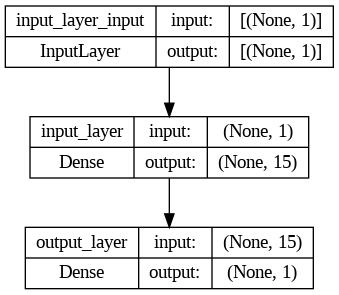

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visulazing our model's predictions

To visualize the predictions, it is good idea to plot them against the truth labels.

We generally call this as `y_preds`, `y_test` and `y_true`

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 76.53106 ],
       [ 81.5165  ],
       [ 86.501945],
       [ 91.48739 ],
       [ 96.47283 ],
       [101.458275],
       [106.44372 ],
       [111.42917 ],
       [116.4146  ],
       [121.40005 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_prediction(train_data=X_train, train_labels=y_train, 
     test_data=X_test, test_labels=y_test, predictions=y_pred):
  
  '''Ploting train data, test data and compare predictions with actual values'''

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  # Plot model in red
  plt.scatter(test_data, predictions, c='r', label='Prediction')
  # Show legend and plot
  plt.legend()
  plt.show()

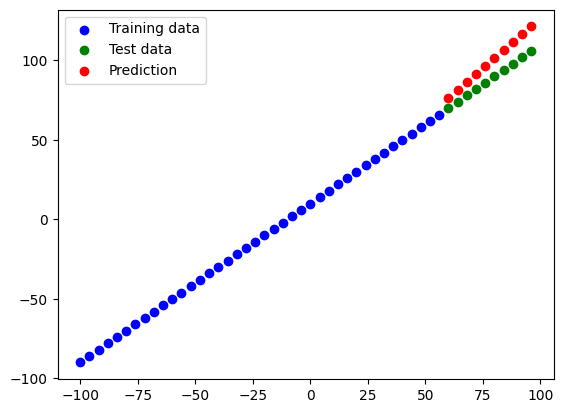

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

There are two main metrics for regression problem:
* MAE - mean absolute error, on average, how wrong is each of model's predictions
* MSE - mean square error, 'square the average errors'

In [ ]:
  # Evaluate the model on the test set
  model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 10.9656 - mae: 10.9656


[10.965551376342773, 10.965551376342773]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred)) # we used tf.squeeze for y_pred becase shape of y_pred is not same with y_test
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.965553>

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, 
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.25491>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [ ]:
# MAE and MSE
print(f'Mean Absolute Error (MAE): {mae(y_test, y_pred)}')
print(f'Mean Square Error (MSE): {mse(y_test, y_pred)}')

Mean Absolute Error (MAE): 10.965553283691406
Mean Square Error (MSE): 128.25491333007812


### Running experiments to improve model

``` 
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> tweak it -> Evaluate it
```

1. Get more data - get more examples for your model to train on.
2. Make your model larger (using more complex model) - this might come in the form more layers on more neoron
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 eepochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 86.3113 - mae: 86.3113
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 50.8558 - mae: 50.8558
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 15.7725 - mae: 15.7725
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.3484 - mae: 8.3484
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1574 - mae: 11.1574
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3048 - mae: 10.3048
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3048 - mae: 9.3048
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2144 - mae: 9.2144
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8645 - mae: 11.8645
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.8039 - mae: 13.8039
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 50ms/step


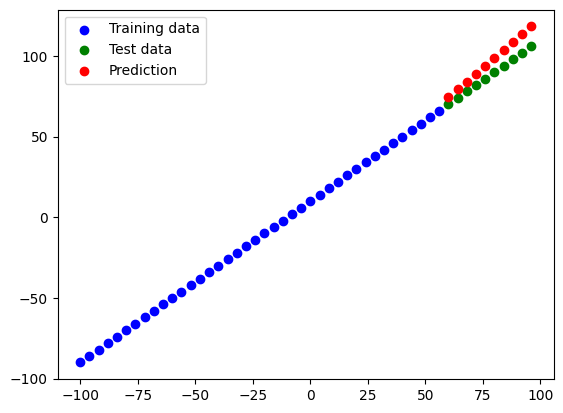

In [ ]:
# Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred_1)

In [ ]:
# Calculate evaluation metrics for model_!
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_1))
print('Mean Square Error (MSE):', mse(y_test, y_pred_1))

Mean Absolute Error (MAE): 8.359485
Mean Square Error (MSE): 76.20581


**Build `model_2`**

* 2 layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 33.2887 - mae: 33.2887
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.8354 - mae: 24.8354
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 30.7663 - mae: 30.7663
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 24.2276 - mae: 24.2276
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.3932 - mae: 14.3932
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4808 - mae: 11.4808
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5119 - mae: 12.5119
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9772 - mae: 10.9772
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.0729 - mae: 39.0729
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.6454 - mae: 26.6454
Epoch 11/100
2/2 [==============================] - 0s 10m

1/1 [==============================] - 0s 58ms/step


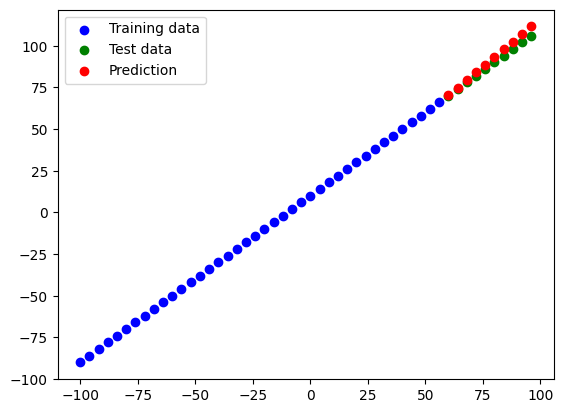

In [ ]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)
plot_prediction(predictions=y_pred_2)

In [ ]:
# Calculate evaluation metrics for model_2
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_2))
print('Mean Square Error (MSE):', mse(y_test, y_pred_2))

Mean Absolute Error (MAE): 2.9985268
Mean Square Error (MSE): 11.753682


**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=['mae']
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 57ms/step


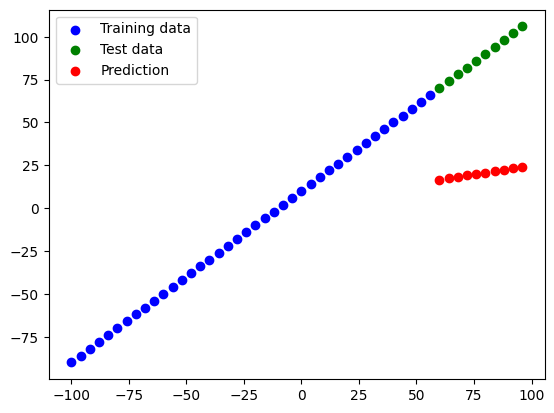

In [ ]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions=y_pred_3)

In [ ]:
# Calculate evaluation metrics for model_3
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_3))
print('Mean Square Error (MSE):', mse(y_test, y_pred_3))

Mean Absolute Error (MAE): 67.66497
Mean Square Error (MSE): 4662.641


We get very poor predictions for model_3 because we trained to much our model and model overfit.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

# model results
model_results = [['model_1', mae(y_test, y_pred_1), mse(y_test, y_pred_1)], 
                 ['model_2', mae(y_test, y_pred_2), mse(y_test, y_pred_2)], 
                 ['model_3', mae(y_test, y_pred_3), mse(y_test, y_pred_3)]]

# Create a dataframe and add results in it
results_df = pd.DataFrame(model_results, columns=['models', 'MAE', 'MSE'])
results_df.head()

,models,MAE,MSE
0,model_1,8.359485,76.205811
1,model_2,2.998527,11.753682
2,model_3,67.664970,4662.641113


Looks like model_2 performed the best.

In [ ]:
 # model summaray
 model_2.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 10)                20        
                                                                 
 dense_158 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Note: One of our main goals should be to minimize the time between our experiments. The more experiments we do, the more things we will figure out which doenst work and in turni get closer to figureing out what does work. 

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments. 

Luckly, there are tools to help us.

* TensorBoard - a component of the tensorflow library to help track modelling experiments.
* Wights & Biases - a tool for tracking all of kinds of machine learning experiments


## Saving our models

Saving model allows us to use models out of Colab such as web application or mobile app etc.

There are two main formats we can save our model's:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save('SavedModel_format') 

In [ ]:
# Save model using the HDF5 format
model_2.save('HDF5_format.h5')

## Loading in saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 10)                20        
                                                                 
 dense_158 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel predictions
print('Model_2 predictions:', model_2.predict(X_test), '\n')
print('SavedModel predictions:', loaded_SavedModel_format.predict(X_test))

1/1 [==============================] - 0s 37ms/step
Model_2 predictions: [[ 70.39453 ]
 [ 74.97321 ]
 [ 79.55187 ]
 [ 84.13053 ]
 [ 88.7092  ]
 [ 93.287865]
 [ 97.86652 ]
 [102.44518 ]
 [107.02384 ]
 [111.60251 ]] 

1/1 [==============================] - 0s 55ms/step
SavedModel predictions: [[ 70.39453 ]
 [ 74.97321 ]
 [ 79.55187 ]
 [ 84.13053 ]
 [ 88.7092  ]
 [ 93.287865]
 [ 97.86652 ]
 [102.44518 ]
 [107.02384 ]
 [111.60251 ]]


In [ ]:
# Load in the .h5 format model
loaded_h5_model = tf.keras.models.load_model('/content/HDF5_format.h5')

In [ ]:
# Compare model_2 predictions with loaded_h5_model predictions
print('Model_2 predictions:', model_2.predict(X_test), '\n')
print('HDF5 predictions:', loaded_h5_model.predict(X_test))

1/1 [==============================] - 0s 21ms/step
Model_2 predictions: [[ 70.39453 ]
 [ 74.97321 ]
 [ 79.55187 ]
 [ 84.13053 ]
 [ 88.7092  ]
 [ 93.287865]
 [ 97.86652 ]
 [102.44518 ]
 [107.02384 ]
 [111.60251 ]] 

1/1 [==============================] - 0s 57ms/step
HDF5 predictions: [[ 70.39453 ]
 [ 74.97321 ]
 [ 79.55187 ]
 [ 84.13053 ]
 [ 88.7092  ]
 [ 93.287865]
 [ 97.86652 ]
 [102.44518 ]
 [107.02384 ]
 [111.60251 ]]


## A Larger Example - Medical Cost Personal Datasets

* Resource: https://www.kaggle.com/datasets/mirichoi0218/insurance
* Raw csv file: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read insurance dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# Let's look first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let's try one-hot encode our data
df_one_hot = pd.get_dummies(df, prefix=['sex', 'smoker', 'region'], drop_first=True)
df_one_hot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
 # Create X & y values (features and labels)
 X = df_one_hot.drop('charges', axis=1)
 y = df_one_hot['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
 # Create training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 print('Total data size:', len(X))
 print('Train data size:', len(X_train))
 print('Test data size:', len(X_test))

Total data size: 1338
Train data size: 1070
Test data size: 268


In [ ]:
 # Build a neural network

 # Set random seed
 tf.random.set_seed(42)

 # 1. Create a model
 model = tf.keras.Sequential([
     tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
 ])

 # 2. Model compiling
 model.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.SGD(),
     metrics = ['mae']
 )

 # 3. Fit the model
 model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7286.5190 - mae: 7286.5190


[7286.51904296875, 7286.51904296875]

In [ ]:
# Let's check the mean and median of test data
y_test.median(), y_test.mean()

(8487.8803, 12968.317062869404)

If we check the mean and median of the y value we can see that our predictions are so poor. Let's try to improve our model.

To try improve our model, we'll run 2 experiments:
1. Add an extra layer with mode hidden units
2. Train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
history_1 = insurance_model_1.fit(X_train, y_train, epochs=100, verbose=0)

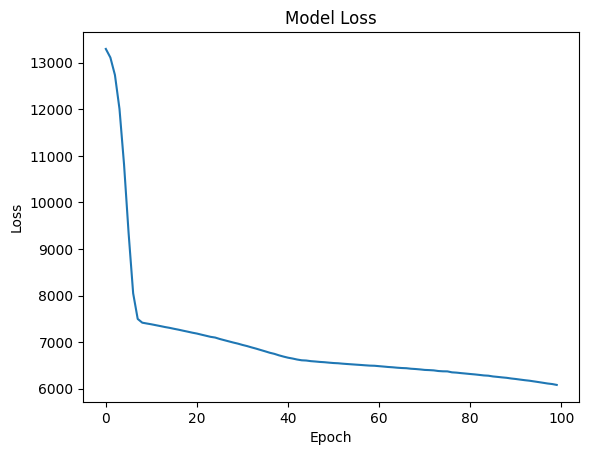

In [ ]:
# plot the training loss and validation loss
plt.plot(history_1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate insurance_model_1
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5956.2251 - mae: 5956.2251


[5956.22509765625, 5956.22509765625]

In [ ]:
# Same as above only we decrease the epochs

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

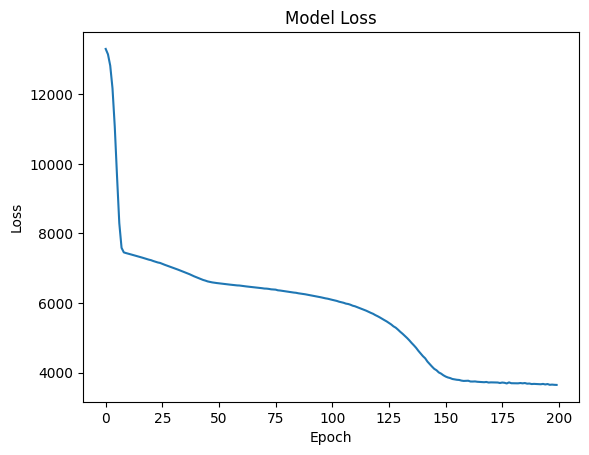

In [ ]:
# plot the training loss and validation loss
plt.plot(history_2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate insurance_model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.0859 - mae: 3440.0859


[3440.0859375, 3440.0859375]

As you see above, we improved our model but now, we should think that how long we train our model. It depends on the problem we are working on. There in no exact solution. But TensorFlow has a solution and it is called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

## Preprocessing data (normalization and standardization)

What is normalization? 

The answer: [Normalization and Standardization](https://scikit-learn.org/stable/modules/preprocessing.html)

In terms of scaling values, neural networks tend to prefer normalization. If you are not sure on which one use, try both and see which performs better.

Let's reimport our data and make preprocessing

In [ ]:
# Read insurance dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# firs five row
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# import neccessary classes from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in between 0 and 1 
    (OneHotEncoder(handle_unknown='ignore', drop='first'), ['sex', 'smoker', 'region'])
)

In [ ]:
# Create X and y (features and labes)
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the column transform to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Check the data what look like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 0.        , 0.        ,
       1.        , 0.        , 0.        ])

Now, our data has been normalized and one hot encoded. Let's build a neural network model with our nomalized data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

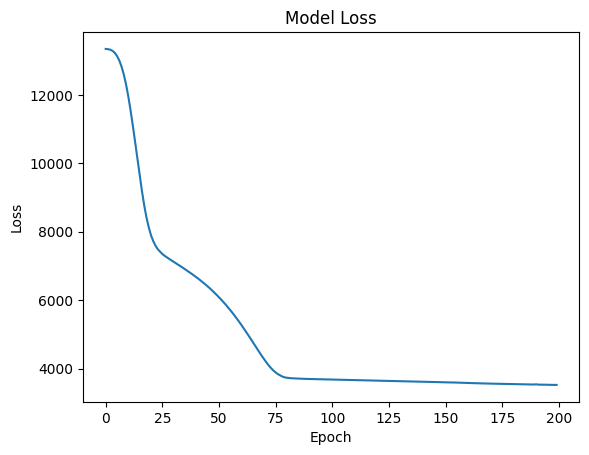

In [ ]:
# plot the training loss and validation loss
plt.plot(history_3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Model evaluation
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3239.3560 - mae: 3239.3560


[3239.35595703125, 3239.35595703125]

Insurance model 2 resulst:
* 9/9 [==============================] - 0s 2ms/step - loss: 3440.0859 - mae: 3440.0859

Result after normalization:
* 9/9 [==============================] - 0s 2ms/step - loss: 3244.9829 - mae: 3244.9829